# Description



## Load CSV Data

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# path_results = "logs/FriedmanDrift/1000000"
# path_results = "logs/Planes2D/1000000"
# path_results = "logs/Friedman/1000000"
# path_results = "logs/Bikes/182470"
# path_results = "logs/Mv/1000000/"
# path_results = "logs/Friedman/1000000"
# path_results ='logs/HouseholdPower/500000/'
path_results = 'logs/CaliforniaHousing/20640/'

# path_results_image = "{}/Images".format(path_results)

# if not os.path.exists(path_results_image):
#     os.makedirs(path_results_image)

simulations = [
    "Linear Regression",
    "Adaptive Random Forest",
    "KNN Regression",
    "EWA",
    "Bagging",
    "PAR Regression",
    # "MLP Regression",
    "HAT Regression",
    "HT Regression",
    "Logistic Regression",
    "SRP",
    "SGT",
    "Ensemble"
]

all_logs = []


def load_data():
    for s in simulations:
        df = pd.read_csv('{}/{}.csv'.format(path_results, s), sep=',')

        if 'Ensemble' == s:
            df['Algorithm'] = 'Ensemble'
        all_logs.append(df)
        # print('/{}/{}.csv'.format(path_results, s))


In [2]:
load_data()
all_logs = pd.concat(all_logs)

# Tabular Data

In [3]:
import prettytable
from prettytable import PrettyTable

# t = PrettyTable(['Algorithm','Avg time to predict', 'Avg time to train', 'MAE', 'MSE', 'R2', 'RMSE', 'SMAPE', 'Rolling_MAE', 'Rolling_MSE',
#  'Rolling_R2', 'Rolling_RMSE', 'Rolling_SMAPE'])
table = PrettyTable()
table.add_column("", ['Avg time to predict (ms)', 'Avg time to train (ms)', 'MAE', 'MSE', 'R2', 'RMSE', 'SMAPE', 'Rolling_MAE', 'Rolling_MSE',
                  'Rolling_R2', 'Rolling_RMSE', 'Rolling_SMAPE'])

algs = all_logs['Algorithm'].unique()
for alg in algs:
    df = all_logs[all_logs['Algorithm'] == alg]

    # print("*{}*".format(alg))
    # print('\tAvg time to predict (ms) =\t {:.4f}'.format(df['Time2predict'].mean()))
    # print('\tAvg time to train (ms) =\t {:.4f}'.format(df['Time2learn'].mean()))

    # Get the first row of dataset
    last_row = df.iloc[0]

    # print('\tMAE =\t {:.4f}'.format(last_row['MAE']))
    # print('\tMSE =\t {:.4f}'.format(last_row['MSE']))
    # print('\tR2 =\t {:.4f}'.format(last_row['R2']))
    # print('\tRMSE =\t {:.4f}'.format(last_row['RMSE']))
    # print('\tSMAPE =\t {:.4f}'.format(last_row['SMAPE']))
    # print('\tRolling_MAE =\t {:.4f}'.format(last_row['Rolling_MAE']))
    # print('\tRolling_MSE =\t {:.4f}'.format(last_row['Rolling_MSE']))
    # print('\tRolling_R2 =\t {:.4f}'.format(last_row['Rolling_R2']))
    # print('\tRolling_RMSE =\t {:.4f}'.format(last_row['Rolling_RMSE']))
    # print('\tRolling_SMAPE =\t {:.4f}'.format(last_row['Rolling_SMAPE']))
    # print()
 
    table.add_column(alg, [df['Time2predict'].mean(), df['Time2learn'].mean(), last_row['MAE'], last_row['MSE'], last_row['R2'], last_row['RMSE'],
                           last_row['SMAPE'], last_row['Rolling_MAE'], last_row['Rolling_MSE'], last_row['Rolling_R2'], last_row['Rolling_RMSE'], last_row['Rolling_SMAPE']])

with open(path_results+'/Ensemble_Results.txt', 'w') as f:
    print(table, file=f)


## One plot per base model

In [4]:
# # This code plots one plot per Algorithm
# import seaborn as sns
# from matplotlib.ticker import PercentFormatter

# algs = all_logs['Algorithm'].unique()
# for alg in algs:
#     # print(alg)
#     dataframe = all_logs[all_logs['Algorithm'] == alg]

#     plt.figure(figsize=(15, 7))
#     sns.set(font_scale=1, style="whitegrid")

#     g = sns.lineplot(
#         data=dataframe,
#         x="Round",
#         y='MAE',
#         # hue="VNF_Instance",
#         # hue_order=VNF_ordered_ID,
#         markers=False,
#         dashes=False,
#         # style="VNF_Instance",
#         # ci=None
#     )

#     # g.set_xlabel("Time (ms)", fontsize = 19)
#     # g.set_ylabel("Mem Load (%)", fontsize = 19)
#     plt.title("Metric MAE - {}".format(alg), fontsize=20)
#     # g.axes.yaxis.set_major_formatter(PercentFormatter(1, symbol="%"))

#     # g.figure.savefig(fname='{}/Images/VNF_Mem_load-{}.png'.format(path_results, alg), transparent=False, pad_inches=0.3, bbox_inches='tight')


# All Models used by Ensemble

EWA                  20623
KNN Regression          15
Linear Regression        1
Name: Algorithm, dtype: int64


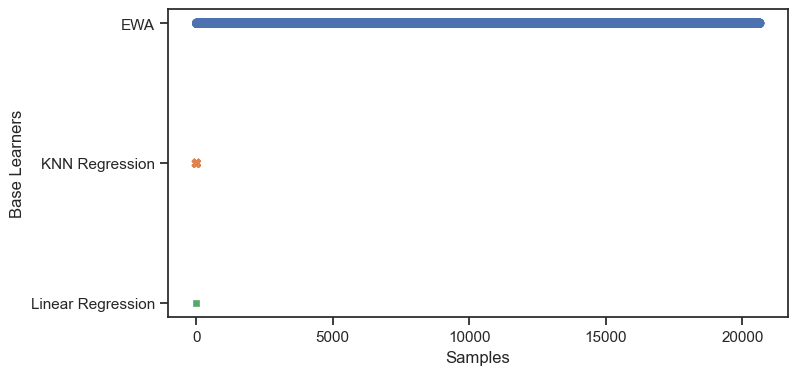

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Open just the ensemble dataframe
ensemble_df = pd.read_csv(
    '{}/{}.csv'.format(path_results, 'Ensemble'), sep=',')
ensemble_df = ensemble_df[ensemble_df['Algorithm'] != 'MLP Regression']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1, style="ticks")
ax = sns.scatterplot(
    data=ensemble_df,
    x="Round",
    y="Algorithm",
    hue="Algorithm",
    style="Algorithm",
    # sizes=(6, 10),
    color=".1",
    marker="+",
    legend=False
)
plt.legend([],[], frameon=False)
# plt.title('Example Plot')

plt.xlabel('Samples')
plt.ylabel('Base Learners')
print(ensemble_df['Algorithm'].value_counts())


## All base model's Metrics in one plot
Take care when using large datasets because this function takes long time.

ValueError: cannot reindex from a duplicate axis

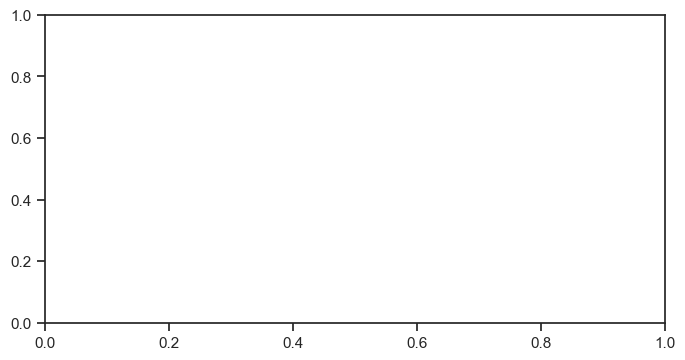

In [6]:
# This code plots one plot per Algorithm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
# sns.set_style("whitegrid")
sns.set_style("ticks")
# all_logs['R2'] = np.where(all_logs['R2'] < 0, 0, all_logs['R2'])
# all_logs['R2'] = all_logs['R2'].clip(lower=0)

# temp_date = all_logs
# temp_date['MAE'] = temp_date['MAE'].clip(lower=0, upper=3)
# temp_date = temp_date[(temp_date['Algorithm'] == 'KNN Regression') |
#                     #   (temp_date['Algorithm'] == 'HAT Regression') |
#                     #   (temp_date['Algorithm'] == 'HT Regression') |
#                       (temp_date['Algorithm'] == 'SGT')|
#                       (temp_date['Algorithm'] == 'SRP')
#                       ]
# temp_date = temp_date[(temp_date['Round'] < 200000) &(temp_date['Round'] > 20000)]
# temp_date2 = temp_date[temp_date['Algorithm'] == 'Logistic Regression']

# SGT                       638254
# SRP                       154691
# HT Regression             142688
# HAT Regression             62819
# Adaptive Random Forest       568
# KNN Regression               142
# Bagging                      103
# EWA                           28
# Linear Regression              2


plt.figure(figsize=(8, 4))
# sns.set(font_scale=1, style="white")

# g = sns.lineplot(
#     data=temp_date2,
#     x="Round",
#     y='MAE',
#     hue="Algorithm",
#     markers=True,
#     dashes=False,
#     estimator=None,
#     lw=4,
#     legend=False,
#     sizes=(.25, 2.5),
# )
# graph = sns.lineplot(
#     data=temp_date,
#     x="Round",
#     y='Rolling_MAE',
#     hue="Algorithm",
#     markers=True,
#     dashes=False,
#     estimator=None,
#     lw=0.2,
#     legend=True,
# )

graph = sns.lineplot(
    data=all_logs,
    x="Round",
    y='MAE',
    hue="Algorithm",
    markers=True,
    dashes=True,
    estimator=None,
    lw=5,
    legend=False,
)



graph.axvline(50000, color='red', linewidth=0.9)
graph.axvline(100000, color='red', linewidth=0.9)
graph.axvline(150000, color='red', linewidth=0.9)

plt.xlabel('Samples')
plt.ylabel('Rolling MAE')
# plt.legend(loc='upper left', labels=[
        #    'LogR MAE', 'KNN-R Rolling MAE', 'HAT-T Rolling MAE', 'HT-R Rolling MAE', 'LogR Rolling MAE'])
# sns.despine(offset=-100, trim=False)

## Subplots

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter
import matplotlib.transforms as transforms
from matplotlib.ticker import FuncFormatter

sns.set(color_codes=True)

fig, axs = plt.subplots(nrows=5, ncols=3)

plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.7)
col = 0

fig.set_figheight(10)
fig.set_figwidth(20)

line = 0
for simulation in simulations:
    dataframe = all_logs[all_logs['Algorithm'] == simulation]
    mean = dataframe['MSE'].mean()
    ax = sns.lineplot(
        data=dataframe,
        x="Round",
        y='MSE',
        # hue="Algorithm",
        dashes=False,
        # style="Algorithm",
        ax=axs[line][col]
    )
    ax.axhline(mean, color='red', ls='--', linewidth=2, label='Mean')
    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(1, mean, "{:.4f}".format(mean), color="red",
            transform=trans, ha="right", va="top", weight="normal", size=20)

    ax.set_xlabel("Round")
    ax.set_ylabel("MSE")

    ax.set_title("{} ".format(simulation))
    col += 1
    if col == 3:
        line += 1
        col = 0

# fig.delaxes(axs[1][1])

# fig.suptitle("VNF Mem Load", fontweight="bold", fontsize="x-large", y=0.95)
plt.show()
